In [ ]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy

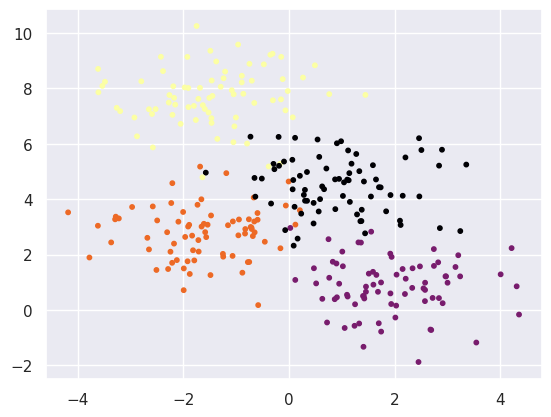

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='inferno');

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = numpy.meshgrid(numpy.linspace(*xlim, num=200), numpy.linspace(*ylim, num=200))
    Z = model.predict(numpy.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(numpy.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=numpy.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

<ipython-input-9-983cf12d9518>:18: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=numpy.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)


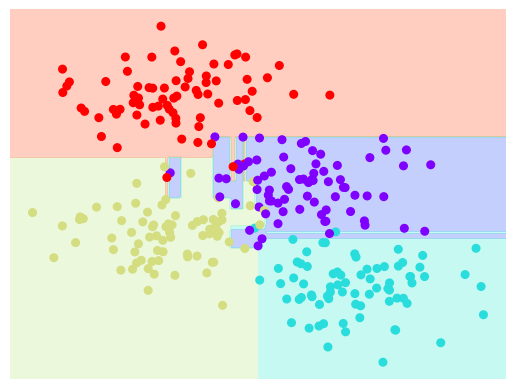

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X, y)

<ipython-input-9-983cf12d9518>:18: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=numpy.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)


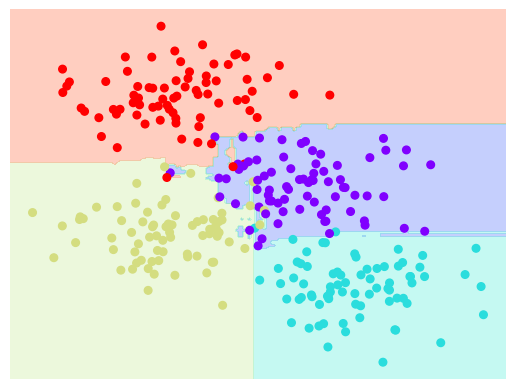

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

In [ ]:
!pip install mlxtend==0.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0


In [ ]:
import pandas

from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load the Iris data set
iris = datasets.load_iris()

# Concat iris['feature_names'] list and string list
iris_datadisplay = pandas.DataFrame(data = numpy.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_datadisplay.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [ ]:
# Define inputs and ouputs (target)
X = iris.data[:, 2:]
y = iris.target

In [ ]:
# Create training/ test data split
tsize = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=1, stratify=y)

In [ ]:
# Create an instance of Random Forest Classifier
ntrees = 1000
method = 'entropy' #gini, log_loss
forest = RandomForestClassifier(criterion=method, n_estimators=ntrees, random_state=5, n_jobs=4)

In [ ]:
# Fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, n_jobs=4,
                       random_state=5)

In [ ]:
# Measure model performance
y_pred = forest.predict(X_test)
prediction_reliability = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % prediction_reliability)

Accuracy: 0.974


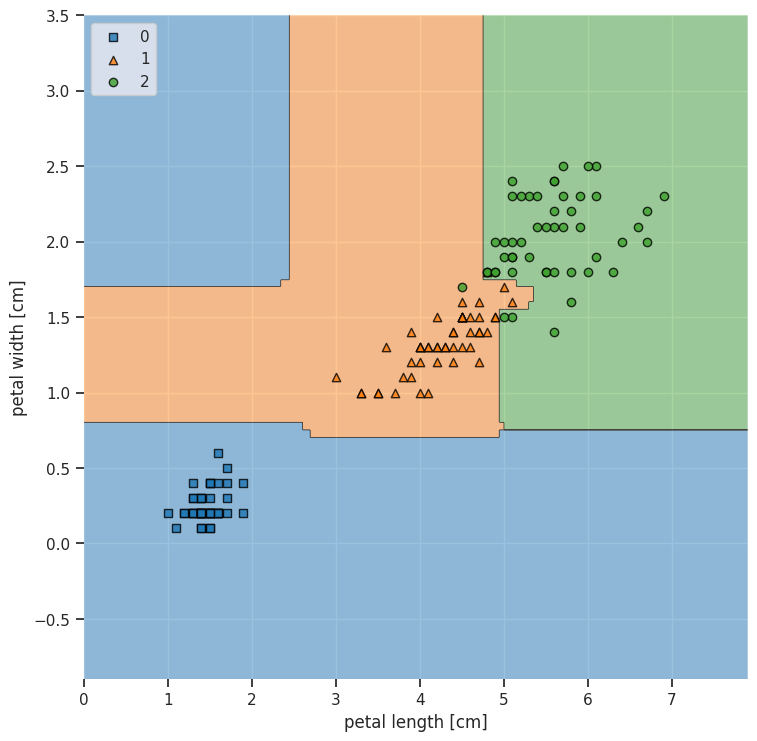

In [ ]:
# Visualize the results
# mlxtend issue  !!!
from mlxtend.plotting import plot_decision_regions

X_combined = numpy.vstack((X_train, X_test))
y_combined = numpy.hstack((y_train, y_test))

# plot_decision_regions
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_visible(False)
fig = plot_decision_regions(X_combined, y_combined, clf=forest)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

ax.set_visible(True)
plt.show()

In [22]:
# Upload the dataset
diamonds = pandas.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [23]:
diamonds.shape


(53940, 10)

In [25]:
pandas.set_option('display.max_columns', None)

In [26]:
diamonds.head(3)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [27]:
# Encode the labels (to numerical values)
from sklearn.preprocessing import LabelEncoder

categorical_features = ['cut', 'color', 'clarity']
le = LabelEncoder()
le.fit(categorical_features)
print(le.classes_)

['clarity' 'color' 'cut']


In [28]:
# Convert the variables to numerical
for i in range(len(categorical_features)):
    new = le.fit_transform(diamonds[categorical_features[i]])
    diamonds[categorical_features[i]] = new

# Check the dataset again
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [29]:
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity', 'cut', 'color']]
y = diamonds[['price']]

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Here we are using random forest for regression.
# While regression helps predict a continuous quantity, classification predicts discrete class labels.
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

# Train the model
method = 'poisson'
reg = RandomForestRegressor(criterion=method, n_estimators = 10, max_depth = 10, random_state = 101)

# convert y_training data to single 1-D array
# https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
y_train_1d = y_train.values.ravel()

# perform the fit
reg.fit(X_train, y_train_1d)

RandomForestRegressor(criterion='poisson', max_depth=10, n_estimators=10,
                      random_state=101)

In [31]:
import warnings
warnings.filterwarnings('ignore')

# Make prediction
predictions = reg.predict(X_test)

result = X_test
result['price'] = y_test
result['predictions'] = predictions.tolist()
result.head()

,carat,depth,table,x,y,z,clarity,cut,color,price,predictions
46519,0.51,62.7,54.0,5.10,5.08,3.19,4,2,3,1781,1668.756376
8639,1.06,61.9,59.0,6.52,6.50,4.03,2,3,5,4452,4335.257446
23029,0.33,61.3,56.0,4.51,4.46,2.75,2,2,3,631,569.163445
51641,0.31,63.1,58.0,4.30,4.35,2.73,5,1,3,544,668.449842
25789,2.04,58.8,60.0,8.42,8.32,4.92,2,3,5,14775,15665.837023


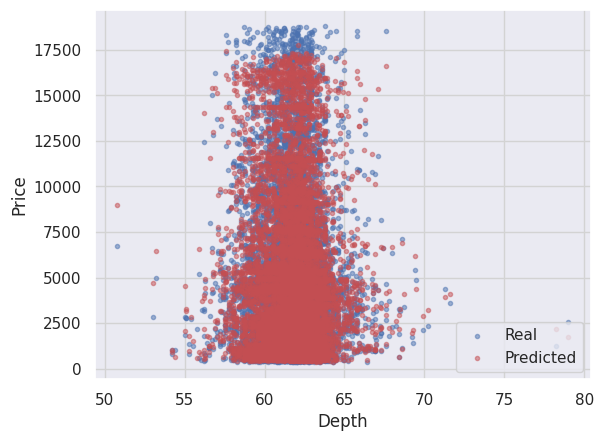

In [32]:

#x_axis = X_test.carat
x_axis = X_test.depth

# Build scatterplot
choice = 'Depth'
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

plt.xlabel(choice)
plt.ylabel('Price')

plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')

In [33]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), predictions)

In [34]:
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 317.3
Mean Squared Error: 347201.69
R-squared scores: 0.98


In [35]:
# Get features list
characteristics = X.columns

# Get the variables importances, sort them, and print the result
importances = list(reg.feature_importances_)
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = False)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];

Variable: depth                Importance: 0.0
Variable: table                Importance: 0.0
Variable: x                    Importance: 0.0
Variable: z                    Importance: 0.0
Variable: cut                  Importance: 0.0
Variable: color                Importance: 0.02
Variable: clarity              Importance: 0.04
Variable: y                    Importance: 0.45
Variable: carat                Importance: 0.48


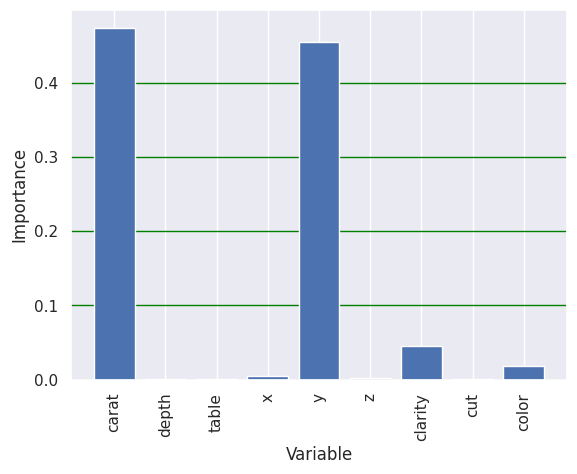

In [36]:
plt.bar(characteristics, importances, orientation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.grid(axis = 'y', color = 'green', linestyle = 'solid')
plt.show()